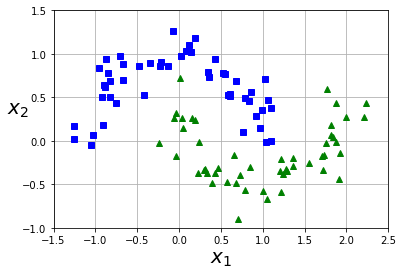

In [1]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X, y = make_moons(n_samples=100, noise=0.15, random_state=1)
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [2]:
ploynomial_svm_clf = Pipeline((
    ("ploy_features",PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("svm_clf",LinearSVC(C=10, loss="hinge"))
))

ploynomial_svm_clf.fit(X,y)

C:\Users\mingm\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('ploy_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

[[ -9.59166085  -8.58353104  -7.61402738 ...  51.0914754   52.86038094
   54.68456682]
 [ -9.39971654  -8.40235875  -7.44378445 ...  49.50590973  51.24878024
   53.04677375]
 [ -9.21403182  -8.22701829  -7.27894559 ...  47.95557722  49.67284047
   51.44506936]
 ...
 [-53.3696941  -51.41479761 -49.51379028 ...  28.08523361  29.32039382
   30.59557136]
 [-54.83499244 -52.84937522 -50.9178045  ...  28.86722235  30.11784029
   31.40831822]
 [-56.32842668 -54.31166096 -52.34909909 ...  29.66256796  30.92907139
   32.23527745]]


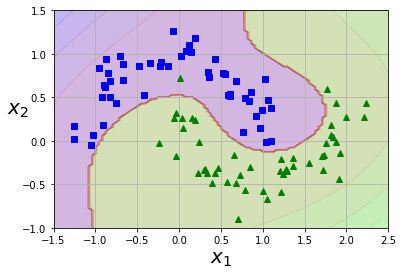

In [6]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


plot_predictions(ploynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# save_fig("moons_polynomial_svc_plot")
plt.show()

[[ -5.8094858   -4.7762643   -3.78306155 ...  39.17377071  40.46479678
   41.80204625]
 [ -5.93319121  -4.90931675  -3.92550972 ...  37.91673857  39.19369544
   40.51682702]
 [ -6.05056538  -5.03576474  -4.06108022 ...  36.69254022  37.9557011
   39.26498803]
 ...
 [-37.51105033 -36.11236911 -34.7584288  ...  20.93540993  22.13384595
   23.3737832 ]
 [-38.57369016 -37.15785343 -35.78680629 ...  21.31019121  22.52106058
   23.77338251]
 [-39.66235427 -38.2290888  -36.84066161 ...  21.68545078  22.90902673
   24.17400654]]
[[ -7.9129949   -4.62254193  -1.48020338 ...  80.17255663  83.54540783
   87.07007994]
 [-10.66932568  -7.35832443  -4.1958157  ...  78.21466427  81.58920614
   85.11556028]
 [-13.32851732  -9.99723455  -6.81482212 ...  76.32979297  79.70580174
   83.23361479]
 ...
 [-86.57976775 -82.46550373 -78.53508304 ... -27.18737169 -24.63717991
  -21.93316704]
 [-88.45406459 -84.34269485 -80.41552925 ... -30.39546968 -27.86342221
  -25.17750486]
 [-90.41843369 -86.31016838 -82.3

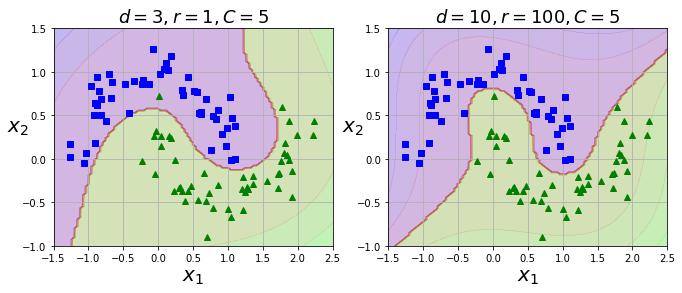

In [7]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)


poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)
plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

# save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()